In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["font.size"] = 16

In [4]:
df = pd.read_csv("bet_each_round_march_randomness.csv")
df = df.loc[:,"rank":]
df

,rank,team_name,final_StatCoin_balance,bet_each_round,edu_level,competitor_type,day_1_guess,day_1_bet,day_1_total,day_2_guess,...,day_13_total,day_14_guess,day_14_bet,day_14_total,day_15_guess,day_15_bet,day_15_total,day_16_guess,day_16_bet,day_16_total
0,1,A Fraction Ahead,9000,yes,Pre-College,Team,Yes,300.0,3700.0,No,...,7300.0,Yes,1500.0,8800.0,No,100.0,8900.0,Yes,100.0,9000.0
1,2,Elidia R,8900,yes,Pre-College,Individual,Yes,1500.0,4000.0,No,...,6500.0,Yes,800.0,7300.0,No,800.0,8100.0,Yes,800.0,8900.0
2,3,Mathster's Stupefying 1 Stars,8400,yes,Pre-College,Team,Yes,800.0,3200.0,No,...,7100.0,No,300.0,6800.0,No,800.0,7600.0,Yes,800.0,8400.0
3,4,Dylan M,8000,yes,Pre-College,Individual,Yes,800.0,3200.0,No,...,5600.0,Yes,800.0,6400.0,No,800.0,7200.0,Yes,800.0,8000.0
4,4,J Fly Money,8000,yes,Pre-College,Individual,Yes,800.0,3200.0,No,...,7200.0,No,800.0,6400.0,No,800.0,7200.0,Yes,800.0,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,3 StDev Above Mu,2000,yes,Pre-College,Team,Yes,300.0,3700.0,No,...,1200.0,No,800.0,400.0,No,800.0,1200.0,Yes,800.0,2000.0
86,87,The Fluffy-Floofy Bears,1800,yes,College,Individual,Yes,1500.0,4000.0,No,...,2600.0,No,800.0,1800.0,No,800.0,2600.0,No,800.0,1800.0
87,88,The Gram,1600,yes,Pre-College,Team,Yes,800.0,3200.0,No,...,2400.0,Yes,800.0,3200.0,Yes,800.0,2400.0,No,800.0,1600.0
88,89,silly snakes,1400,yes,Pre-College,Team,Yes,800.0,3200.0,No,...,1700.0,No,300.0,1400.0,No,800.0,2200.0,No,800.0,1400.0


In [5]:
all_teams_average = []
for day in range(1,17):
    all_teams_average.append(df["day_" + str(day) + "_total"].mean())

In [6]:
college_teams_average = []
for day in range(1,17):
    df_college_teams = df[(df['edu_level'] == "College") & (df['competitor_type'] == "Team")]    
    college_teams_average.append(df_college_teams["day_" + str(day) + "_total"].mean())

In [7]:
pre_college_teams_average = []
for day in range(1,17):
    df_pre_college_teams = df[(df['edu_level'] == "Pre-College") & (df['competitor_type'] == "Team")]    
    pre_college_teams_average.append(df_pre_college_teams["day_" + str(day) + "_total"].mean())

In [8]:
college_individuals_average = []
for day in range(1,17):
    df_college_individuals = df[(df['edu_level'] == "College") & (df['competitor_type'] == "Individual")]    
    college_individuals_average.append(df_college_individuals["day_" + str(day) + "_total"].mean())

In [9]:
pre_college_individuals_average = []
for day in range(1,17):
    df_pre_college_individuals = df[(df['edu_level'] == "Pre-College") & (df['competitor_type'] == "Individual")]    
    pre_college_individuals_average.append(df_pre_college_individuals["day_" + str(day) + "_total"].mean())

In [10]:
my_team_list = []
for day in range(1,17):
    my_team = df[df["team_name"] == "10% Trimmed Mean Muggers"]
    my_team_list.append(my_team["day_" + str(day) + "_total"].mean())

In [11]:
# create a DataFrame for Figure 1



fig_1_df = pd.DataFrame({"challenge" : list(range(1,17)),
                         "college_teams_difference": pd.Series(college_teams_average) - pd.Series(all_teams_average),
                         "pre_college_teams_difference": pd.Series(pre_college_teams_average) - pd.Series(all_teams_average),
                         "college_individuals_difference": pd.Series(college_individuals_average) - pd.Series(all_teams_average),
                         "pre_college_individuals_difference": pd.Series(pre_college_individuals_average) - pd.Series(all_teams_average),
                         "my_team_difference": pd.Series(my_team_list) - pd.Series(all_teams_average)})
fig_1_df

,challenge,college_teams_difference,pre_college_teams_difference,college_individuals_difference,pre_college_individuals_difference,my_team_difference
0,1,411.666667,-11.060606,-113.333333,30.666667,-13.333333
1,2,195.555556,-43.080808,-230.915033,201.555556,-354.444444
2,3,420.000000,-127.727273,-118.235294,238.000000,-130.000000
3,4,309.444444,-206.464646,-68.496732,360.444444,-215.555556
4,5,765.555556,-202.626263,-149.150327,335.555556,115.555556
5,6,270.000000,-225.454545,-277.058824,542.000000,-130.000000
6,7,519.444444,-228.282828,-252.614379,490.444444,-305.555556
7,8,471.111111,-240.252525,-267.124183,529.111111,-478.888889
8,9,617.222222,-373.686869,-231.307190,716.222222,-807.777778
9,10,248.333333,-394.848485,-282.549020,847.333333,-1176.666667


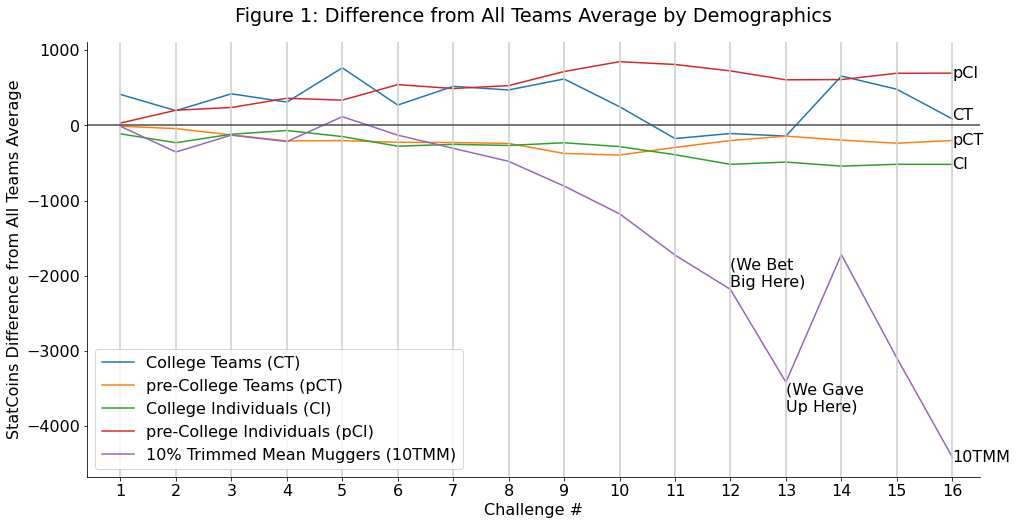

In [12]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.xlim(left=0.4, right=16.5)

fig_1_df.plot.line(x="challenge", y="college_teams_difference", label="College Teams (CT)", ax=ax)
fig_1_df.plot.line(x="challenge", y="pre_college_teams_difference", label="pre-College Teams (pCT)", ax=ax)
fig_1_df.plot.line(x="challenge", y="college_individuals_difference", label="College Individuals (CI)", ax=ax)
fig_1_df.plot.line(x="challenge", y="pre_college_individuals_difference", label="pre-College Individuals (pCI)", ax=ax)
fig_1_df.plot.line(x="challenge", y="my_team_difference", label="10% Trimmed Mean Muggers (10TMM)", ax=ax)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
    
ax.set_xlabel("Challenge #")
ax.set_ylabel("StatCoins Difference from All Teams Average")

ax.text(16, 140, "CT",
        va="center", ha="left")
ax.text(16, fig_1_df.iloc[-1, 2], "pCT",
        va="center", ha="left")
ax.text(16, fig_1_df.iloc[-1, 3], "CI",
        va="center", ha="left")
ax.text(16, fig_1_df.iloc[-1, 4], "pCI",
        va="center", ha="left")
ax.text(16, fig_1_df.iloc[-1, 5], "10TMM",
        va="center", ha="left")

ax.text(12, fig_1_df.iloc[11, 5], """(We Bet
Big Here)""", va="bottom", ha="left")
ax.text(13, fig_1_df.iloc[12, 5], """(We Gave
Up Here)""", va="top", ha="left")

ax.legend(loc='lower left')

fig = ax.get_figure()

# learned to use this here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(range(1,17))

# learned this here: 
# https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot-in-matplotlib
for i in range(1,17):
    plt.axvline(x=i, color="0.8",)

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
plt.axhline(y=0, xmax=16.5, color="0.3")

plt.title(label="Figure 1: Difference from All Teams Average by Demographics", pad=20)

fig.savefig("figure_1.png", dpi=300, bbox_inches="tight")

In [13]:
# Figure 1 stats

print(fig_1_df.mean())
print(fig_1_df[:7].mean())
print(fig_1_df[:8].mean())

challenge                                8.500000
college_teams_difference               314.062500
pre_college_teams_difference          -207.954545
college_individuals_difference        -310.477941
pre_college_individuals_difference     526.875000
my_team_difference                   -1253.125000
dtype: float64
challenge                               4.000000
college_teams_difference              413.095238
pre_college_teams_difference         -149.242424
college_individuals_difference       -172.829132
pre_college_individuals_difference    314.095238
my_team_difference                   -147.619048
dtype: float64
challenge                               4.500000
college_teams_difference              420.347222
pre_college_teams_difference         -160.618687
college_individuals_difference       -184.616013
pre_college_individuals_difference    340.972222
my_team_difference                   -189.027778
dtype: float64
